In [1]:
!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv(r"C:\Users\91958\Desktop\Shubhs\Segmentation Project\customer_segemtation.csv")
data.head()

,Unnamed: 0,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [4]:
data.columns

Index(['Unnamed: 0', 'RENTROLLDATE', 'FACILITYID', 'UNITNUMBER',
       'UNITREFLECTIONS', 'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS',
       'PERSONID', 'RESIDENTID', 'ADMISSIONDATE', 'DISCHARGEDATE',
       'DISCHARGED', 'SHORTTERMSTAY', 'ONHOLD', 'ONHOLDREASON',
       'ROOMBOARDRATEPERIOD', 'SERVICELEVELRATEPERIOD', 'MEDADMINRATEPERIOD',
       'RATECODE', 'OCCUPANCYTYPE', 'PAYOR', 'ROOMBOARDRATE',
       'SERVICELEVELRATE', 'MEDADMINRATE', 'ROOMBOARDMARKETRATE',
       'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE'],
      dtype='object')

In [5]:
data.drop(data.columns[0],axis=1,inplace=True)

In [6]:
data.head(5)

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,272906.0,21867.0,04-11-2021,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,286942.0,22840.0,17-06-2022,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,293978.0,23195.0,31-08-2022,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,237734.0,19752.0,17-09-2019,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,252727.0,21744.0,01-10-2021,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [7]:
data.tail(5)

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,PERSONID,RESIDENTID,ADMISSIONDATE,...,MEDADMINRATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
492361,22-03-2023,39,131,y,n,n,Studio,270584.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492362,22-03-2023,39,134,y,n,n,Studio,266941.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,278.0,0,0
492363,22-03-2023,39,230,n,n,n,Two Bed Room,237991.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492364,22-03-2023,39,408,n,n,n,Two Bed Room,282193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,258.0,0,0
492365,22-03-2023,67,235,y,y,n,Studio Deluxe,224801.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,277.0,0,0


In [8]:
data.drop('PERSONID',axis=1,inplace=True)

In [9]:
data.dtypes


RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
ROOMBOARDRATEPERIOD        object
SERVICELEVELRATEPERIOD     object
MEDADMINRATEPERIOD         object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE       float64
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [10]:
data.describe()

,FACILITYID,RESIDENTID,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
count,492366.000000,380830.000000,492366.000000,492366.000000,492366.000000,491791.000000,492366.000000,492366.000000
mean,45.294628,20587.488612,419.179175,50.954250,26.533671,288.345656,40.015568,21.105606
std,22.570691,3314.740002,1244.395693,229.591765,127.935775,85.753727,38.496767,17.796414
min,1.000000,657.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,19463.000000,98.000000,0.000000,0.000000,278.000000,0.000000,0.000000
50%,43.000000,21547.000000,225.000000,0.000000,0.000000,313.000000,47.000000,30.000000
75%,66.000000,22877.000000,300.000000,47.000000,21.000000,339.000000,79.000000,39.000000
max,76.000000,24265.000000,11391.000000,2557.000000,1237.000000,481.000000,115.000000,46.000000


In [11]:
#checking for duplicated Values
data.duplicated().sum()

0

In [12]:
#check for Null Values
data.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
UNITREFLECTIONS                0
UNITSERENADE                   0
UNITINDEPENDENT                0
UNITCLASS                      0
RESIDENTID                111536
ADMISSIONDATE             111536
DISCHARGEDATE             468530
DISCHARGED                111536
SHORTTERMSTAY               2417
ONHOLD                    111536
ONHOLDREASON              113060
ROOMBOARDRATEPERIOD       111536
SERVICELEVELRATEPERIOD    111536
MEDADMINRATEPERIOD        111536
RATECODE                  111536
OCCUPANCYTYPE             111536
PAYOR                     111536
ROOMBOARDRATE                  0
SERVICELEVELRATE               0
MEDADMINRATE                   0
ROOMBOARDMARKETRATE          575
SERVICELEVELMARKETRATE         0
MEDADMINMARKETRATE             0
dtype: int64

DATA CLEANING

In [13]:
#Dropping Servicelevelrate period and Medadminrateperiod period because we dont need it
data.drop(['MEDADMINRATEPERIOD','SERVICELEVELRATEPERIOD'],axis=1,inplace=True)


In [14]:
data.rename(columns={'ROOMBOARDRATEPERIOD':'RATEPERIOD'},inplace=True)

In [15]:
data.head()

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,RATEPERIOD,RATECODE,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,daily,A,individual,Private,210.0,0.0,0.0,265.0,103,46
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,daily,A,individual,Private,339.0,40.0,39.0,265.0,40,39
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,daily,TC,individual,Private,225.0,0.0,0.0,240.0,55,39
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,daily,A,individual,Private,239.0,55.0,46.0,240.0,55,46
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,daily,A,individual,Private,236.0,0.0,0.0,240.0,110,39


In [16]:
#Calculating mean of ROOMBOARDMARKETRATE when 'RATEPERIOD' is 'daily'
dmean=data[data['RATEPERIOD']=='daily']['ROOMBOARDRATE'].mean

In [17]:
#Filling null values of remaining columns with appropraite strategy.

data['ROOMBOARDMARKETRATE']=data['ROOMBOARDMARKETRATE'].fillna(dmean)
data['SHORTTERMSTAY']=data['SHORTTERMSTAY'].fillna(data['SHORTTERMSTAY'].mode()[0])

In [18]:
data.dtypes

RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
RATEPERIOD                 object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE        object
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [19]:
data['ROOMBOARDMARKETRATE'] = pd.to_numeric(data['ROOMBOARDMARKETRATE'], errors='coerce')


In [20]:
data.dtypes

RENTROLLDATE               object
FACILITYID                  int64
UNITNUMBER                 object
UNITREFLECTIONS            object
UNITSERENADE               object
UNITINDEPENDENT            object
UNITCLASS                  object
RESIDENTID                float64
ADMISSIONDATE              object
DISCHARGEDATE              object
DISCHARGED                 object
SHORTTERMSTAY              object
ONHOLD                     object
ONHOLDREASON               object
RATEPERIOD                 object
RATECODE                   object
OCCUPANCYTYPE              object
PAYOR                      object
ROOMBOARDRATE             float64
SERVICELEVELRATE          float64
MEDADMINRATE              float64
ROOMBOARDMARKETRATE       float64
SERVICELEVELMARKETRATE      int64
MEDADMINMARKETRATE          int64
dtype: object

In [21]:
data.groupby('RATEPERIOD')['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE'].mean()

,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE
RATEPERIOD,,,
daily,241.341674,25.604589,11.498334
monthly,6602.723327,877.857579,494.125972


In [22]:
data.groupby('RATEPERIOD')['ROOMBOARDMARKETRATE','SERVICELEVELMARKETRATE','MEDADMINMARKETRATE'].mean()

,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE
RATEPERIOD,,,
daily,280.852263,51.916562,26.955939
monthly,282.619693,48.077962,33.960436


There is a huge variance in rates for residents, when the 'RATEPERIOD' is monthly, so standardizing it as daily rate.

In [23]:
#Dividing the rate columns for residents by 30 when 'RATEPERIOD' is monthly.

ratecol=['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE']

for col in ratecol:
    data.loc[data['RATEPERIOD']=='monthly',col]=data.loc[data['RATEPERIOD']=='monthly',col]/30

In [24]:
data.groupby('RATEPERIOD')['ROOMBOARDRATE','SERVICELEVELRATE','MEDADMINRATE'].mean()

,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE
RATEPERIOD,,,
daily,241.341674,25.604589,11.498334
monthly,220.090778,29.261919,16.470866


In [25]:
#Adding 'Overallboardrate' column representing the total amount the resident was charged for that date.
data['Overallboardrate']=data['ROOMBOARDRATE']+data['SERVICELEVELRATE']+data['MEDADMINRATE']
data['Overallmarketboardrate']=data['ROOMBOARDMARKETRATE']+data['SERVICELEVELMARKETRATE']+data['MEDADMINMARKETRATE']

In [26]:
data.head()

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,OCCUPANCYTYPE,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,Overallboardrate,Overallmarketboardrate
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,individual,Private,210.0,0.0,0.0,265.0,103,46,210.0,414.0
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,individual,Private,339.0,40.0,39.0,265.0,40,39,418.0,344.0
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,individual,Private,225.0,0.0,0.0,240.0,55,39,225.0,334.0
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,individual,Private,239.0,55.0,46.0,240.0,55,46,340.0,341.0
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,individual,Private,236.0,0.0,0.0,240.0,110,39,236.0,389.0


In [27]:
#Adding 'Unit Segemnt' column representing all the possible combinations of UNITREFLECTIONS,'UNITSERENADE','UNITINDEPENDENT'
data['Unit_segment']=data['UNITREFLECTIONS']+'_'+data['UNITSERENADE']+'_'+data['UNITINDEPENDENT']

In [28]:
data['Unit_segment'].value_counts()

n_n_n    291140
y_n_n     93004
n_y_n     57205
y_y_n     41323
n_n_y      9694
Name: Unit_segment, dtype: int64

We get 5 out of 8 possible combinations . It can be also seen that the unit can only be independent if it is neither a 'memory care' as well not part of 'luxury program'

In [29]:
data.columns

Index(['RENTROLLDATE', 'FACILITYID', 'UNITNUMBER', 'UNITREFLECTIONS',
       'UNITSERENADE', 'UNITINDEPENDENT', 'UNITCLASS', 'RESIDENTID',
       'ADMISSIONDATE', 'DISCHARGEDATE', 'DISCHARGED', 'SHORTTERMSTAY',
       'ONHOLD', 'ONHOLDREASON', 'RATEPERIOD', 'RATECODE', 'OCCUPANCYTYPE',
       'PAYOR', 'ROOMBOARDRATE', 'SERVICELEVELRATE', 'MEDADMINRATE',
       'ROOMBOARDMARKETRATE', 'SERVICELEVELMARKETRATE', 'MEDADMINMARKETRATE',
       'Overallboardrate', 'Overallmarketboardrate', 'Unit_segment'],
      dtype='object')

In [30]:
data

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,Overallboardrate,Overallmarketboardrate,Unit_segment
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,Private,210.0,0.0,0.0,265.0,103,46,210.0,414.0,n_n_n
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,Private,339.0,40.0,39.0,265.0,40,39,418.0,344.0,n_n_n
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,Private,225.0,0.0,0.0,240.0,55,39,225.0,334.0,n_n_n
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,Private,239.0,55.0,46.0,240.0,55,46,340.0,341.0,n_n_n
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,Private,236.0,0.0,0.0,240.0,110,39,236.0,389.0,n_n_n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y,n,n,Studio,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,278.0,0,0,0.0,278.0,y_n_n
492362,22-03-2023,39,134,y,n,n,Studio,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,278.0,0,0,0.0,278.0,y_n_n
492363,22-03-2023,39,230,n,n,n,Two Bed Room,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,258.0,0,0,0.0,258.0,n_n_n
492364,22-03-2023,39,408,n,n,n,Two Bed Room,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,258.0,0,0,0.0,258.0,n_n_n



# SEGMENTATION

In [31]:
#Creating a new dataframe with columns specific for resident segmentation.

datacustomer=data[['RENTROLLDATE','RESIDENTID','ADMISSIONDATE', 'DISCHARGEDATE','DISCHARGED','SHORTTERMSTAY','RATEPERIOD','OCCUPANCYTYPE','PAYOR', 'Overallboardrate']].copy()



In [32]:
datacustomer.head()


,RENTROLLDATE,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
0,04-01-2023,21867.0,04-11-2021,NaN,n,no,daily,individual,Private,210.0
1,04-01-2023,22840.0,17-06-2022,NaN,n,no,daily,individual,Private,418.0
2,04-01-2023,23195.0,31-08-2022,NaN,n,no,daily,individual,Private,225.0
3,04-01-2023,19752.0,17-09-2019,NaN,n,no,daily,individual,Private,340.0
4,04-01-2023,21744.0,01-10-2021,NaN,n,no,daily,individual,Private,236.0


In [33]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID          111536
ADMISSIONDATE       111536
DISCHARGEDATE       468530
DISCHARGED          111536
SHORTTERMSTAY            0
RATEPERIOD          111536
OCCUPANCYTYPE       111536
PAYOR               111536
Overallboardrate         0
dtype: int64

The null values in 'RESIDENTID' here represent that the unit was vacant for that date , so the corresponding columns have same null values, which is not useful for customer segmentation , so these rows can be dropped.

In [34]:
datacustomer=datacustomer[datacustomer['RESIDENTID'].notnull()].copy()

In [35]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID               0
ADMISSIONDATE            0
DISCHARGEDATE       356994
DISCHARGED               0
SHORTTERMSTAY            0
RATEPERIOD               0
OCCUPANCYTYPE            0
PAYOR                    0
Overallboardrate         0
dtype: int64

In [36]:
datacustomer['DISCHARGEDATE'].fillna(pd.NaT,inplace=True)

In [37]:
datacustomer.isnull().sum()

RENTROLLDATE             0
RESIDENTID               0
ADMISSIONDATE            0
DISCHARGEDATE       356994
DISCHARGED               0
SHORTTERMSTAY            0
RATEPERIOD               0
OCCUPANCYTYPE            0
PAYOR                    0
Overallboardrate         0
dtype: int64

In [38]:
#To convert into pandas datetime object.
col_date=['RENTROLLDATE','ADMISSIONDATE','DISCHARGEDATE']
for col in col_date:
    datacustomer[col] = pd.to_datetime(datacustomer[col])

In [39]:
#Sorting the dataframe according to rent roll date in descending order
datacustomer=datacustomer.sort_values('RENTROLLDATE',ascending=False)

In [40]:
#Grouping the dataset by 'RESIDENTID' and picking the first entry for each resident id.
unit_Res=datacustomer.groupby('RESIDENTID').first()
unit_Res

,RENTROLLDATE,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
RESIDENTID,,,,,,,,,
657.0,2023-12-06,2003-09-30,NaT,n,no,daily,individual,Medicaid,130.0
2476.0,2023-12-06,2021-12-19,NaT,n,no,daily,individual,Medicaid,118.0
2774.0,2023-12-02,2002-01-11,2023-05-03,n,no,daily,individual,Private,170.0
3377.0,2023-12-06,2007-11-21,NaT,n,no,daily,individual,Private,191.0
3388.0,2023-12-06,2018-07-16,NaT,n,no,daily,individual,Private,292.0
...,...,...,...,...,...,...,...,...,...
24257.0,2023-06-14,2023-06-14,NaT,n,no,daily,individual,Private,300.0
24259.0,2023-06-14,2023-06-13,NaT,n,no,daily,individual,Private,290.0
24260.0,2023-12-06,2023-09-06,NaT,n,no,daily,individual,Private,397.0


In the dataframe 'unit_res' , each row represents a unique residentid from the dataset , and "RENTROLLDATE" represents the latest date for which the entry was recorded for that resident.¶

In [41]:
#Adding mean of 'Overallboardrate' for each resident.
unit_Res['Overallboardrate']=datacustomer.groupby('RESIDENTID')['Overallboardrate'].mean().round() 

In [42]:
unit_Res

,RENTROLLDATE,ADMISSIONDATE,DISCHARGEDATE,DISCHARGED,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate
RESIDENTID,,,,,,,,,
657.0,2023-12-06,2003-09-30,NaT,n,no,daily,individual,Medicaid,130.0
2476.0,2023-12-06,2021-12-19,NaT,n,no,daily,individual,Medicaid,117.0
2774.0,2023-12-02,2002-01-11,2023-05-03,n,no,daily,individual,Private,173.0
3377.0,2023-12-06,2007-11-21,NaT,n,no,daily,individual,Private,191.0
3388.0,2023-12-06,2018-07-16,NaT,n,no,daily,individual,Private,292.0
...,...,...,...,...,...,...,...,...,...
24257.0,2023-06-14,2023-06-14,NaT,n,no,daily,individual,Private,300.0
24259.0,2023-06-14,2023-06-13,NaT,n,no,daily,individual,Private,290.0
24260.0,2023-12-06,2023-09-06,NaT,n,no,daily,individual,Private,397.0


The 'ADMISSIONDATE' date represents the date the candidate was admitted to the facility . so using it and latest 'RENTROLLDATE' for a particular "RESIDENTID' we can determine the number of days they have stayed until the latest date in dataset which is '2023-06-14'. If a resident leaves the facility before , it is represented by 'y' in 'DISCHARGED' column.

In [43]:
#Adding length of stay in dataset.
unit_Res['Length of stay']=((unit_Res['RENTROLLDATE']-unit_Res['ADMISSIONDATE']).dt.days)+1

'Length of stay' include both admission date and last 'RENTROLLDATE"

In [44]:
#Dropping irrelevant columns for resident segmentation.
unit_Res.drop(['RENTROLLDATE','ADMISSIONDATE','DISCHARGEDATE'],axis=1,inplace=True)
unit_Res.rename(columns={'DISCHARGED':'Left the facility'},inplace=True)

In [45]:
unit_Res

,Left the facility,SHORTTERMSTAY,RATEPERIOD,OCCUPANCYTYPE,PAYOR,Overallboardrate,Length of stay
RESIDENTID,,,,,,,
657.0,n,no,daily,individual,Medicaid,130.0,7373
2476.0,n,no,daily,individual,Medicaid,117.0,718
2774.0,n,no,daily,individual,Private,173.0,7996
3377.0,n,no,daily,individual,Private,191.0,5860
3388.0,n,no,daily,individual,Private,292.0,1970
...,...,...,...,...,...,...,...
24257.0,n,no,daily,individual,Private,300.0,1
24259.0,n,no,daily,individual,Private,290.0,2
24260.0,n,no,daily,individual,Private,397.0,92


In [46]:
unit_Res['PAYOR'].value_counts()

Private     2529
Medicaid     346
PAL            3
Name: PAYOR, dtype: int64

Count value of PAL is very less so dropping that

In [47]:
unit_Res.drop(unit_Res[unit_Res['PAYOR']=='PAL'].index,inplace=True)

# SCALING AND ENCODING

In [48]:
scaled_df=unit_Res.copy()

<Axes: xlabel='Overallboardrate'>

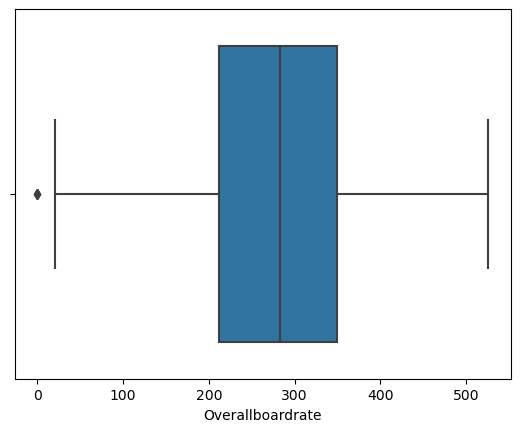

In [49]:
#Checking for outliers.
sns.boxplot(data=scaled_df,x='Overallboardrate')

<Axes: xlabel='Length of stay'>

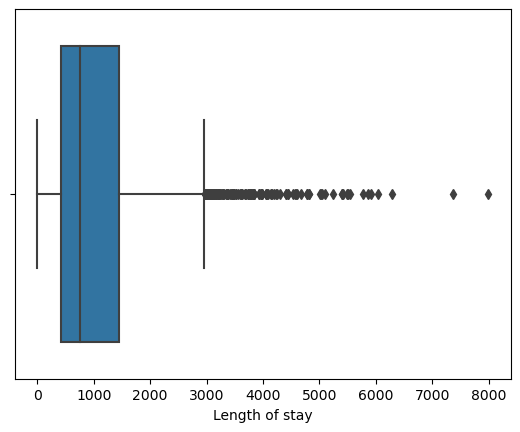

In [50]:
sns.boxplot(data=scaled_df,x='Length of stay')

In [51]:
#Transforming outliers for 'length of stay'
columnData = scaled_df['Length of stay'].values

#Transforming into normal data data using BOCX COX
transformed_data, lambda_value = boxcox(columnData)

# Create a new column in the DataFrame with the transformed data
scaled_df['Length of stay']=transformed_data

<Axes: xlabel='Length of stay'>

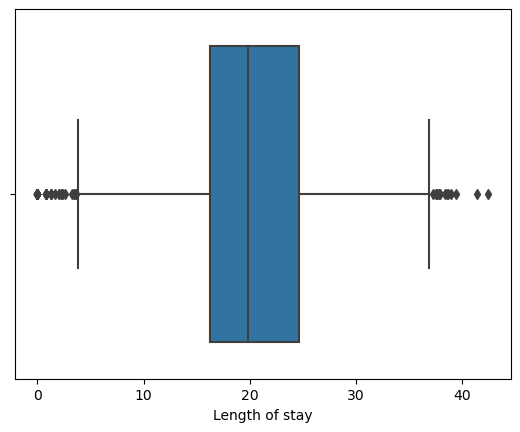

In [52]:
sns.boxplot(data=scaled_df,x='Length of stay')

In [53]:
#CATEGORICAL DATA TO BINARY USING LABEL ENCODING
cat_col=['Left the facility', 'SHORTTERMSTAY', 'RATEPERIOD','PAYOR']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in cat_col:
    scaled_df[col]=LE.fit_transform(scaled_df[col])

In [54]:
#One-Hot encoding.
col_encode=['OCCUPANCYTYPE']
scaled_df=pd.get_dummies(scaled_df,columns=col_encode,drop_first=True)

In [55]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler

#list of numerical columns
col_num=['Overallboardrate','Length of stay']

SS=StandardScaler()
scaled_df[col_num]=SS.fit_transform(scaled_df[col_num])

In [56]:
scaled_df

,Left the facility,SHORTTERMSTAY,RATEPERIOD,PAYOR,Overallboardrate,Length of stay,OCCUPANCYTYPE_individual,OCCUPANCYTYPE_semi-private
RESIDENTID,,,,,,,,
657.0,0,0,0,0,-1.462053,3.406860,1,0
2476.0,0,0,0,0,-1.591473,-0.128738,1,0
2774.0,0,0,0,1,-1.033970,3.577682,1,0
3377.0,0,0,0,1,-0.854773,2.944213,1,0
3388.0,0,0,0,1,0.150723,1.120116,1,0
...,...,...,...,...,...,...,...,...
24257.0,0,0,0,1,0.230366,-3.282688,1,0
24259.0,0,0,0,1,0.130812,-3.158781,1,0
24260.0,0,0,0,1,1.196041,-1.784630,1,0


#Dimensionality Reduction using PCA


In [57]:
pca=PCA(n_components=2)#no pf pca components.
PC=pca.fit_transform(scaled_df)

In [58]:
pca.explained_variance_ratio_

array([0.48535803, 0.36365196])

In [59]:
#Creating a nre dataframe using pca columns
pca_df1=pd.DataFrame(PC,columns=['pca_1','pca_2'])
pca_df1

,pca_1,pca_2
0,3.461437,-1.546216
1,1.226973,1.172290
2,3.066875,-2.001207
3,2.520547,-1.647754
4,0.594305,-0.953145
...,...,...
2870,-2.361921,2.273166
2871,-2.208533,2.246617
2872,-2.072153,0.519963
2873,-1.153972,1.381816



##### K-means clustering


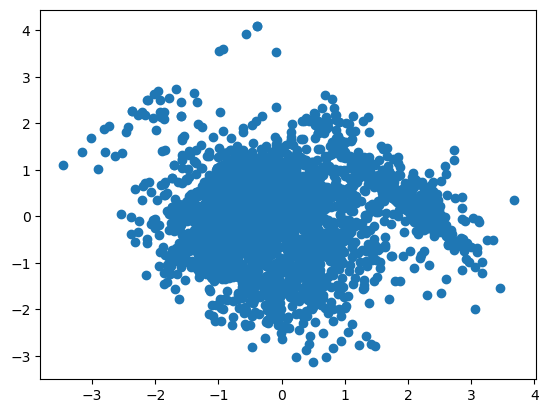

In [60]:
plt.scatter(pca_df1['pca_1'],pca_df1['pca_2'])

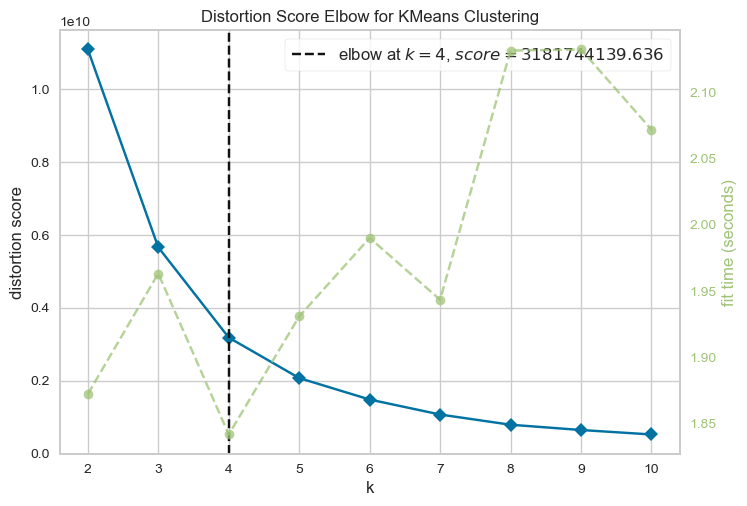

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
#elbow methid to find no of cllusters.
from yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=1000)

elb_visualizer=KElbowVisualizer(km,k=(2,11))
elb_visualizer.fit(pca_df1)
elb_visualizer.show()

In [62]:
#clusters=5

Kmodel=KMeans(n_clusters=5)
Kmodel.fit(pca_df1)

KMeans(n_clusters=5)

In [63]:
Kmodel.labels_

array([2, 4, 2, ..., 1, 1, 1])

In [64]:
#adding clusters to resident df
unit_Res['Clusters']=Kmodel.labels_

In [65]:
#Adding residentID and clusters column to PCA dataframe.
pca_df1['RESIDENTID']=unit_Res.index

In [66]:
pca_df1

,pca_1,pca_2,RESIDENTID
0,3.461437,-1.546216,657.0
1,1.226973,1.172290,2476.0
2,3.066875,-2.001207,2774.0
3,2.520547,-1.647754,3377.0
4,0.594305,-0.953145,3388.0
...,...,...,...
2870,-2.361921,2.273166,24257.0
2871,-2.208533,2.246617,24259.0
2872,-2.072153,0.519963,24260.0
2873,-1.153972,1.381816,24264.0


In [67]:
import plotly.express as px
custom_colors = ["red", "blue", "purple",'yellow','pink']
px.scatter(data_frame=pca_df1,x='pca_1',y='pca_2',hover_data=['RESIDENTID'],hover_name='RESIDENTID',color_continuous_scale=custom_colors)

<Axes: xlabel='Clusters', ylabel='count'>

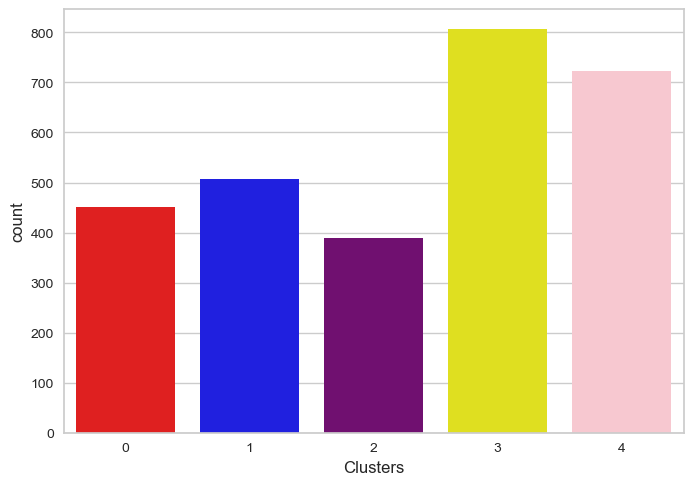

In [68]:
sns.countplot(data=unit_Res,x='Clusters',palette=custom_colors)

In [69]:
unit_Res.groupby(['Clusters','Left the facility']).count()

SHORTTERMSTAY  RATEPERIOD  OCCUPANCYTYPE  PAYOR  \
Clusters Left the facility                                                    
0        n                            415         415            415    415   
         y                             36          36             36     36   
1        n                            436         436            436    436   
         y                             71          71             71     71   
2        n                            346         346            346    346   
         y                             43          43             43     43   
3        n                            729         729            729    729   
         y                             77          77             77     77   
4        n                            659         659            659    659   
         y                             63          63             63     63   

                            Overallboardrate  Length of stay  
Clusters Left the facility                                    
0        n                               415             415  
         y                                36              36  
1        n                               436             436  
         y                                71              71  
2        n                               346             346  
         y                                43              43  
3        n                               729             729  
         y                                77              77  
4        n                               659             659  
         y                                63              63

<Axes: xlabel='Clusters', ylabel='Overallboardrate'>

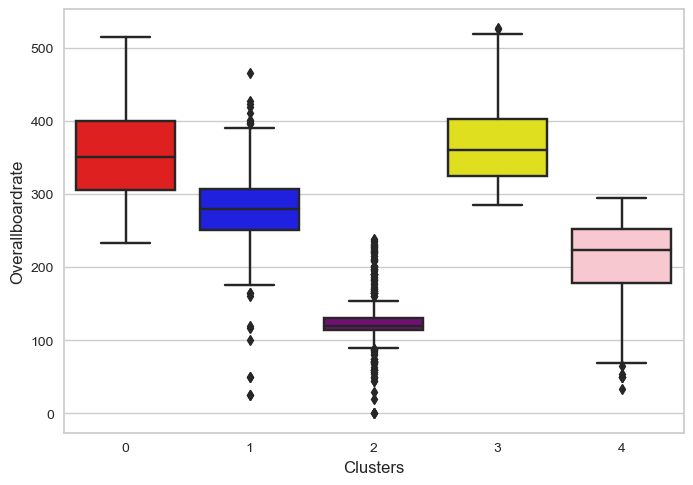

In [70]:
sns.boxplot(data=unit_Res,y='Overallboardrate',x='Clusters',palette=custom_colors)

<Axes: xlabel='Overallboardrate', ylabel='Count'>

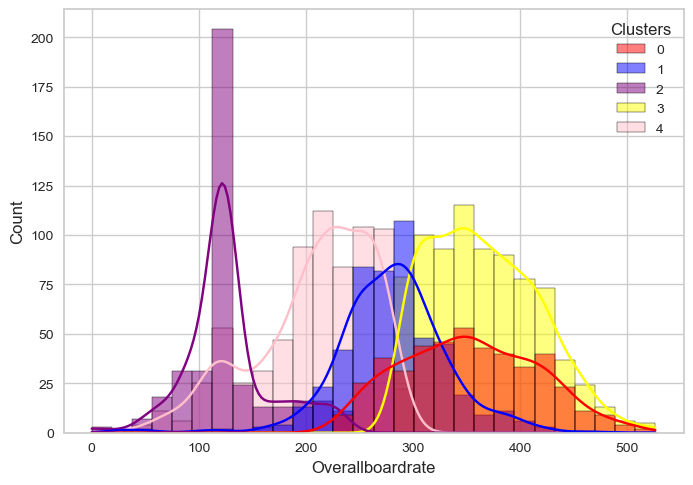

In [71]:
sns.histplot(data=unit_Res,x='Overallboardrate',hue='Clusters',palette=custom_colors, kde=True)

<Axes: xlabel='Clusters', ylabel='Length of stay'>

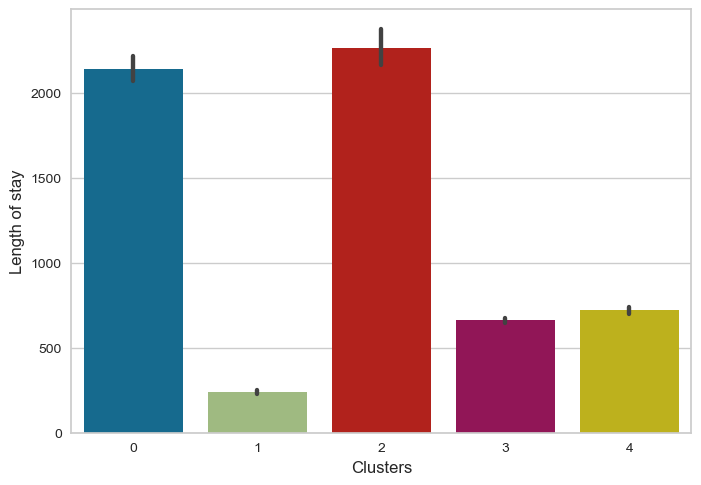

In [72]:
sns.barplot(data=unit_Res,y='Length of stay',x='Clusters')

<Axes: xlabel='Clusters', ylabel='count'>

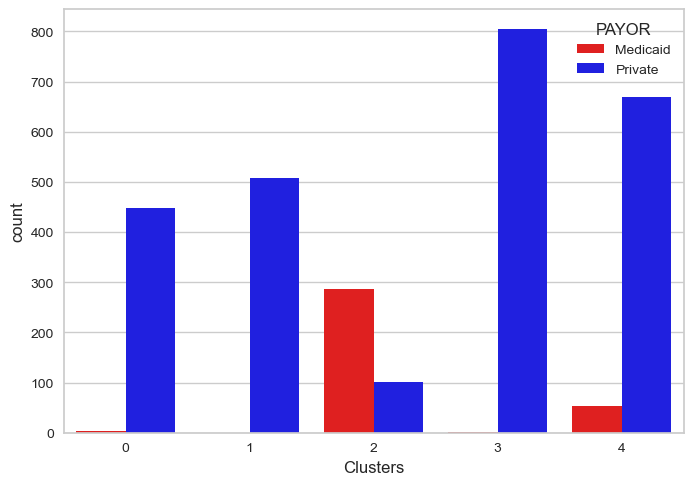

In [73]:
sns.countplot(data=unit_Res,x='Clusters',hue='PAYOR',palette=custom_colors)

<Axes: xlabel='Clusters', ylabel='count'>

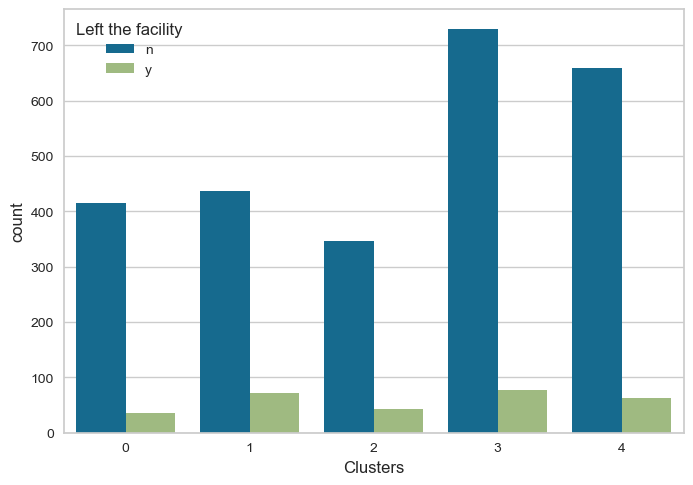

In [74]:
sns.countplot(data=unit_Res,x='Clusters',hue='Left the facility')

<Axes: xlabel='Clusters', ylabel='count'>

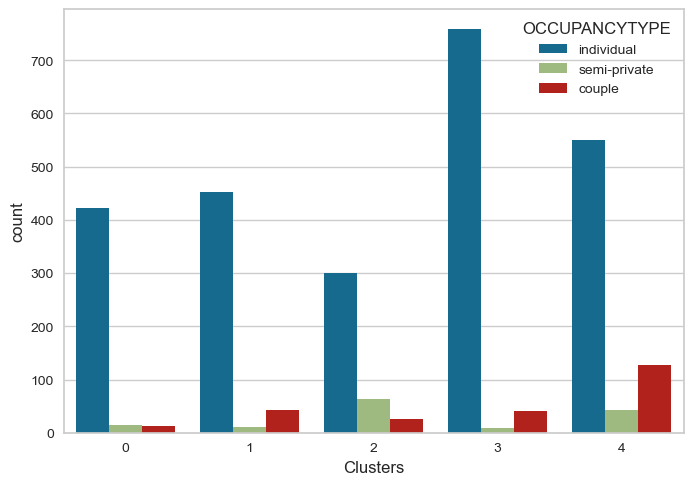

In [75]:
sns.countplot(data=unit_Res,x='Clusters',hue='OCCUPANCYTYPE')

<Axes: xlabel='OCCUPANCYTYPE', ylabel='count'>

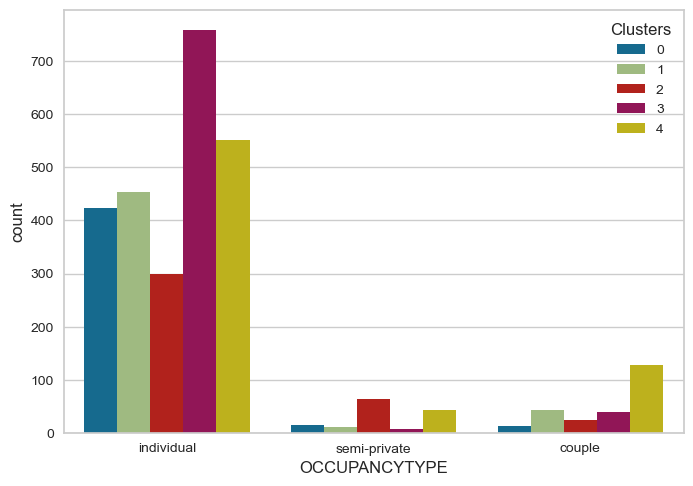

In [76]:
sns.countplot(data=unit_Res,hue='Clusters',x='OCCUPANCYTYPE')

<Axes: xlabel='Clusters', ylabel='count'>

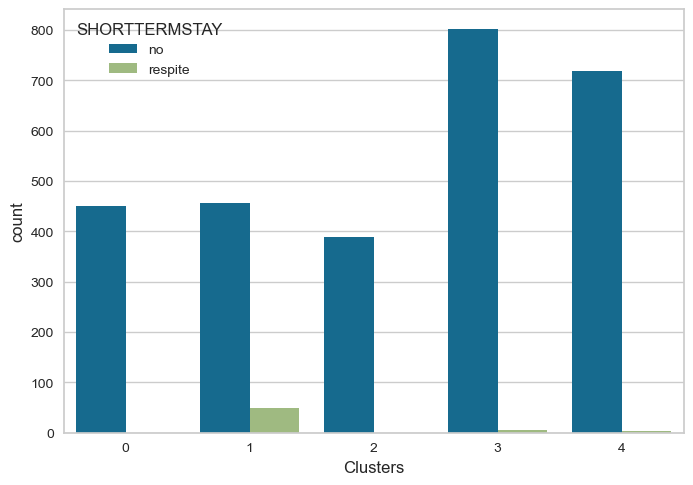

In [77]:
sns.countplot(data=unit_Res,x='Clusters',hue='SHORTTERMSTAY')

# Cluster0

There are 800+ residents in this cluster (MAX)

The average unit rate charged to residents is 460+ (MAX) 

The Average Length of stay is 600+

The Payor type for residents in this cluster is 'Private'

# Cluster 1
There are 700+ residents in this cluster

The average unit rate charged to residents is 210+

The Average Length of stay is 700+

The Payor type for residents in this cluster is 'Private

# Cluster 2

There are 350+ residents in this cluster

The average unit rate charged to residents is 110+

The Average Length of stay is 2000+ (MAX)

The Payor type for residents in this cluster is 'Medicaid'

# Cluster 3

There are 500+ residents in this cluster

The average unit rate charged to residents is 250+

The Average Length of stay is 100+

The Payor type for residents in this cluster is 'Private'

# Cluster 4

There are 400+ residents in this cluster

The average unit rate charged to residents is 325+

The Average Length of stay is 2000+

The Payor type for residents in this cluster is 'Private'

### UNIT Segmentation

In [78]:
#Creating new dataframe with relevant columns for unit Segmentation

data

,RENTROLLDATE,FACILITYID,UNITNUMBER,UNITREFLECTIONS,UNITSERENADE,UNITINDEPENDENT,UNITCLASS,RESIDENTID,ADMISSIONDATE,DISCHARGEDATE,...,PAYOR,ROOMBOARDRATE,SERVICELEVELRATE,MEDADMINRATE,ROOMBOARDMARKETRATE,SERVICELEVELMARKETRATE,MEDADMINMARKETRATE,Overallboardrate,Overallmarketboardrate,Unit_segment
0,04-01-2023,71,201,n,n,n,Studio Deluxe,21867.0,04-11-2021,NaN,...,Private,210.0,0.0,0.0,265.0,103,46,210.0,414.0,n_n_n
1,04-01-2023,71,202,n,n,n,Studio Deluxe,22840.0,17-06-2022,NaN,...,Private,339.0,40.0,39.0,265.0,40,39,418.0,344.0,n_n_n
2,04-01-2023,71,204,n,n,n,Studio,23195.0,31-08-2022,NaN,...,Private,225.0,0.0,0.0,240.0,55,39,225.0,334.0,n_n_n
3,04-01-2023,71,205,n,n,n,Studio,19752.0,17-09-2019,NaN,...,Private,239.0,55.0,46.0,240.0,55,46,340.0,341.0,n_n_n
4,04-01-2023,71,206,n,n,n,Studio,21744.0,01-10-2021,NaN,...,Private,236.0,0.0,0.0,240.0,110,39,236.0,389.0,n_n_n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y,n,n,Studio,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,278.0,0,0,0.0,278.0,y_n_n
492362,22-03-2023,39,134,y,n,n,Studio,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,278.0,0,0,0.0,278.0,y_n_n
492363,22-03-2023,39,230,n,n,n,Two Bed Room,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,258.0,0,0,0.0,258.0,n_n_n
492364,22-03-2023,39,408,n,n,n,Two Bed Room,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,258.0,0,0,0.0,258.0,n_n_n


In [79]:
unitdata=data[['RENTROLLDATE', 'FACILITYID', 'UNITNUMBER','Unit_segment',
             'UNITCLASS', 'RESIDENTID','ONHOLD', 'ONHOLDREASON','OCCUPANCYTYPE','Overallboardrate','Overallmarketboardrate','PAYOR']].copy()

In [80]:
unitdata

,RENTROLLDATE,FACILITYID,UNITNUMBER,Unit_segment,UNITCLASS,RESIDENTID,ONHOLD,ONHOLDREASON,OCCUPANCYTYPE,Overallboardrate,Overallmarketboardrate,PAYOR
0,04-01-2023,71,201,n_n_n,Studio Deluxe,21867.0,n,no,individual,210.0,414.0,Private
1,04-01-2023,71,202,n_n_n,Studio Deluxe,22840.0,n,no,individual,418.0,344.0,Private
2,04-01-2023,71,204,n_n_n,Studio,23195.0,n,no,individual,225.0,334.0,Private
3,04-01-2023,71,205,n_n_n,Studio,19752.0,n,no,individual,340.0,341.0,Private
4,04-01-2023,71,206,n_n_n,Studio,21744.0,n,no,individual,236.0,389.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...
492361,22-03-2023,39,131,y_n_n,Studio,NaN,NaN,NaN,NaN,0.0,278.0,NaN
492362,22-03-2023,39,134,y_n_n,Studio,NaN,NaN,NaN,NaN,0.0,278.0,NaN
492363,22-03-2023,39,230,n_n_n,Two Bed Room,NaN,NaN,NaN,NaN,0.0,258.0,NaN
492364,22-03-2023,39,408,n_n_n,Two Bed Room,NaN,NaN,NaN,NaN,0.0,258.0,NaN


In [81]:
unitdata.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
Unit_segment                   0
UNITCLASS                      0
RESIDENTID                111536
ONHOLD                    111536
ONHOLDREASON              113060
OCCUPANCYTYPE             111536
Overallboardrate               0
Overallmarketboardrate       575
PAYOR                     111536
dtype: int64

We observe that ONHOLDREASON have some null values corresponds to value 'y' in 'ONHOLD' column. So filling only those null values with 'Hospital' which is mode when 'ONEHOLD' is y.

In [82]:
unitdata.loc[(unitdata['RESIDENTID'].notnull()) & (unitdata['ONHOLDREASON'].isnull()),'ONHOLDREASON']='hospital'

In [83]:
unitdata.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
Unit_segment                   0
UNITCLASS                      0
RESIDENTID                111536
ONHOLD                    111536
ONHOLDREASON              111536
OCCUPANCYTYPE             111536
Overallboardrate               0
Overallmarketboardrate       575
PAYOR                     111536
dtype: int64

Here '111536' null values represent that units were vacant on that rentrolldate.

Some units in differnet facilities have same 'UNITNUMBER' making it difficult to differentiate

In [84]:
#Creating a unique identifier 'UniqueID' using combination of 'FACILITYID' & 'UNITNUMBER' representing each unit 
unitdata['UniqueID']=unitdata['FACILITYID'].astype('str')+'_'+unitdata['UNITNUMBER']

In [85]:
#Creating a new column "VACANT" which contains value 'Y' corresponding to null values of 'RESIDENTID'
unitdata.loc[unitdata['RESIDENTID'].isnull(),'VACANT']='y'

In [86]:
#Removing null values
unitdata=unitdata[unitdata['RESIDENTID'].notnull()].copy()

In [87]:
unitdata.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
Unit_segment                   0
UNITCLASS                      0
RESIDENTID                     0
ONHOLD                         0
ONHOLDREASON                   0
OCCUPANCYTYPE                  0
Overallboardrate               0
Overallmarketboardrate       480
PAYOR                          0
UniqueID                       0
VACANT                    380830
dtype: int64

In [91]:
unitdata['Overallmarketboardrate']=unitdata['Overallmarketboardrate'].fillna(0)

In [92]:
unitdata.isnull().sum()

RENTROLLDATE                   0
FACILITYID                     0
UNITNUMBER                     0
Unit_segment                   0
UNITCLASS                      0
RESIDENTID                     0
ONHOLD                         0
ONHOLDREASON                   0
OCCUPANCYTYPE                  0
Overallboardrate               0
Overallmarketboardrate         0
PAYOR                          0
UniqueID                       0
VACANT                    380830
dtype: int64

In [93]:
unitdata['UniqueID'].value_counts()

66_119    330
11_109    330
67_406    330
1_304     330
75_327    330
         ... 
71_607      2
71_518      1
31_E4       1
75_314      1
76_212      1
Name: UniqueID, Length: 2563, dtype: int64

In [94]:
#To calculate mode.
def calmode(x):
    return x.mode().iloc[0]

In [96]:
#Creating a new dataframe where each row represents a unique 'UNIQUEID'.

unitseg=unitdata.groupby('UniqueID').agg({'FACILITYID':'first',
                                    'UNITNUMBER':'first',
                                 'Unit_segment':'first',
                                  'UNITCLASS':'first',
                                   'PAYOR':'first',
                                 'OCCUPANCYTYPE':calmode,
                                 'Overallboardrate':'mean'
                                  })

In [97]:
unitseg

,FACILITYID,UNITNUMBER,Unit_segment,UNITCLASS,PAYOR,OCCUPANCYTYPE,Overallboardrate
UniqueID,,,,,,,
10_100,10,100,n_n_n,Studio Deluxe,Medicaid,individual,120.000000
10_101,10,101,n_n_n,Two Bed Room,Private,individual,364.875969
10_102,10,102,n_n_n,Studio,Private,individual,159.690909
10_103,10,103,n_n_n,Studio,Private,individual,265.000000
10_104,10,104,n_n_n,Studio Deluxe,Private,individual,388.000000
...,...,...,...,...,...,...,...
76_326,76,326,n_n_n,Studio,Private,individual,118.000000
76_327,76,327,n_n_n,One Bed Room,Private,individual,275.000000
76_328,76,328,n_n_n,One Bed Room,Private,individual,367.429907


In [98]:
unitseg.isnull().sum()

FACILITYID          0
UNITNUMBER          0
Unit_segment        0
UNITCLASS           0
PAYOR               0
OCCUPANCYTYPE       0
Overallboardrate    0
dtype: int64

### ENCODING

In [99]:
scaledunitseg=unitseg.copy()

In [100]:
labelencoder=LabelEncoder()
scaledunitseg['Unit_segment']=labelencoder.fit_transform(scaledunitseg['Unit_segment'])

In [101]:
scaledunitseg['Unit_segment'].value_counts()

0    1547
3     510
2     241
4     218
1      47
Name: Unit_segment, dtype: int64

In [103]:
#One hot encoding
columns_encode=['UNITCLASS','PAYOR','OCCUPANCYTYPE']

scaledunitseg=pd.get_dummies(scaledunitseg,columns=columns_encode)

In [105]:
#Dropping irrelevant columns
scaledunitseg.drop(['FACILITYID','UNITNUMBER'],axis=1,inplace=True)

In [107]:
scaledunitseg.shape

(2563, 12)

In [108]:
scaledunitseg.dtypes

Unit_segment                    int32
Overallboardrate              float64
UNITCLASS_One Bed Room          uint8
UNITCLASS_Studio                uint8
UNITCLASS_Studio Deluxe         uint8
UNITCLASS_Two Bed Room          uint8
PAYOR_Medicaid                  uint8
PAYOR_PAL                       uint8
PAYOR_Private                   uint8
OCCUPANCYTYPE_couple            uint8
OCCUPANCYTYPE_individual        uint8
OCCUPANCYTYPE_semi-private      uint8
dtype: object

In [109]:
#Scaling Numerical columns.

#List of numerical columns.
num_col=['Overallboardrate']

stdscaler=StandardScaler()

scaledunitseg[num_col]=stdscaler.fit_transform(scaledunitseg[num_col])

In [112]:
scaledunitseg

,Unit_segment,Overallboardrate,UNITCLASS_One Bed Room,UNITCLASS_Studio,UNITCLASS_Studio Deluxe,UNITCLASS_Two Bed Room,PAYOR_Medicaid,PAYOR_PAL,PAYOR_Private,OCCUPANCYTYPE_couple,OCCUPANCYTYPE_individual,OCCUPANCYTYPE_semi-private
UniqueID,,,,,,,,,,,,
10_100,0,-1.709083,0,0,1,0,1,0,0,0,1,0
10_101,0,0.877602,0,0,0,1,0,0,1,0,1,0
10_102,0,-1.289818,0,1,0,0,0,0,1,0,1,0
10_103,0,-0.177413,0,1,0,0,0,0,1,0,1,0
10_104,0,1.121867,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76_326,0,-1.730210,0,1,0,0,0,0,1,0,1,0
76_327,0,-0.071780,1,0,0,0,0,0,1,0,1,0
76_328,0,0.904580,1,0,0,0,0,0,1,0,1,0


In [113]:
#Dimensionality reduction using PCA
pcad=PCA(n_components=2)
PCAD=pcad.fit_transform(scaledunitseg)

In [115]:
pcad.explained_variance_ratio_

array([0.55553828, 0.24693419])

In [117]:
fdata=pd.DataFrame(PCAD,columns=['pca_1','pca_2'])
fdata

,pca_1,pca_2
0,-1.565548,1.640360
1,-0.933570,-1.124561
2,-1.326191,1.022673
3,-1.074752,0.010762
4,-0.885278,-1.339141
...,...,...
2558,-1.425733,1.423280
2559,-1.207988,-0.393442
2560,-0.987300,-1.281598
2561,-1.052792,-1.018025


<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=11, random_state=1000), k=(2, 12))>

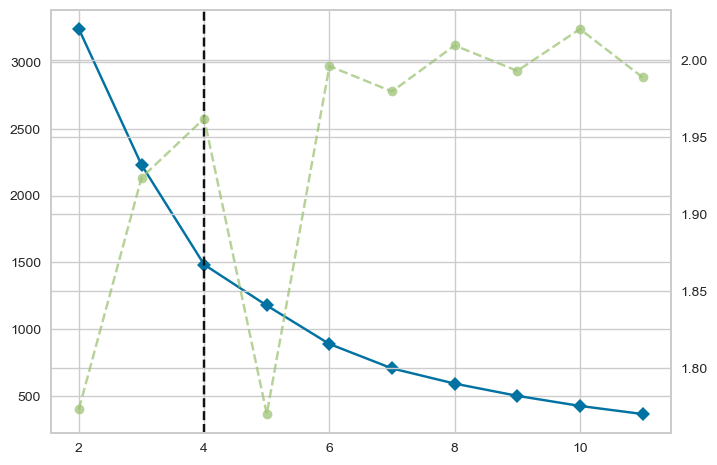

In [119]:
#DETERMINE BEST VALUE OF K

mudel=KMeans(random_state=1000)

elb_visualizer1=KElbowVisualizer(mudel,k=(2,12))
elb_visualizer1.fit(fdata)
elb_visualizer1.show

In [120]:
#cluster=4

kmeansmodel=KMeans(n_clusters=4)

kmeansmodel.fit(fdata)

KMeans(n_clusters=4)

In [121]:
#Adding Clusters column to unit dataframe.
unitseg['Clusters']=kmeansmodel.labels_

In [122]:
fdata['UniqueID']=unitseg.index

In [125]:
unitseg['Clusters'].value_counts()

2    973
0    621
1    609
3    360
Name: Clusters, dtype: int64

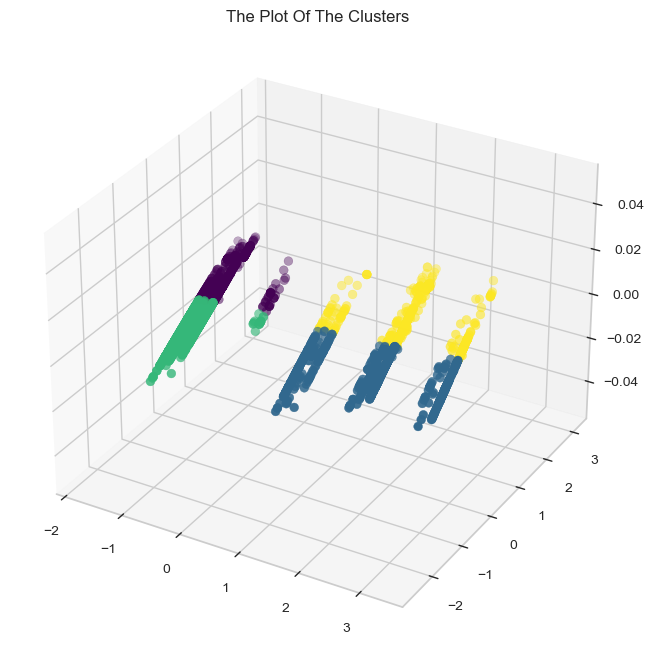

In [126]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data=fdata,xs='pca_1', ys='pca_2', s=40, c=unitseg['Clusters'], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [128]:
px.scatter_3d(data_frame=fdata,x='pca_1', y='pca_2',color=unitseg['Clusters'],hover_name='UniqueID')

<Axes: xlabel='Clusters', ylabel='count'>

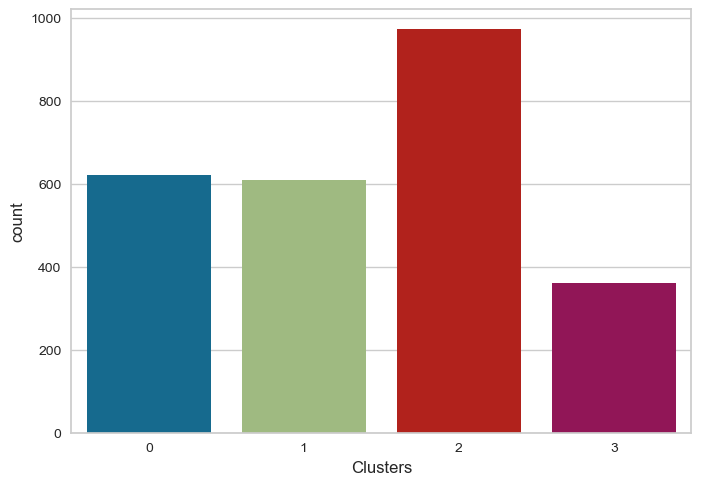

In [129]:
sns.countplot(data=unitseg,x='Clusters')

<Axes: xlabel='Clusters', ylabel='Overallboardrate'>

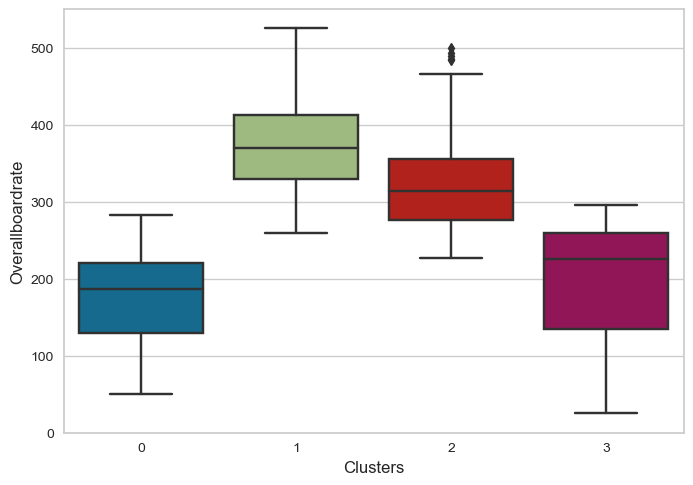

In [130]:
sns.boxplot(data=unitseg,y='Overallboardrate',x='Clusters')

<Axes: xlabel='Clusters', ylabel='count'>

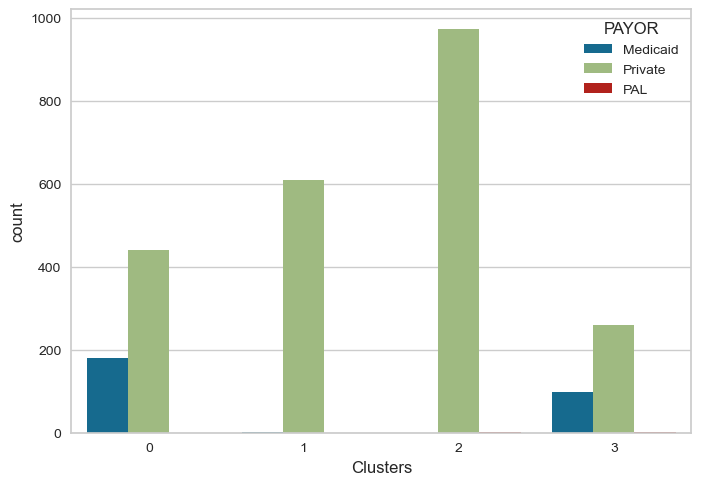

In [132]:
sns.countplot(data=unitseg,x='Clusters',hue='PAYOR')

<Axes: xlabel='Clusters', ylabel='count'>

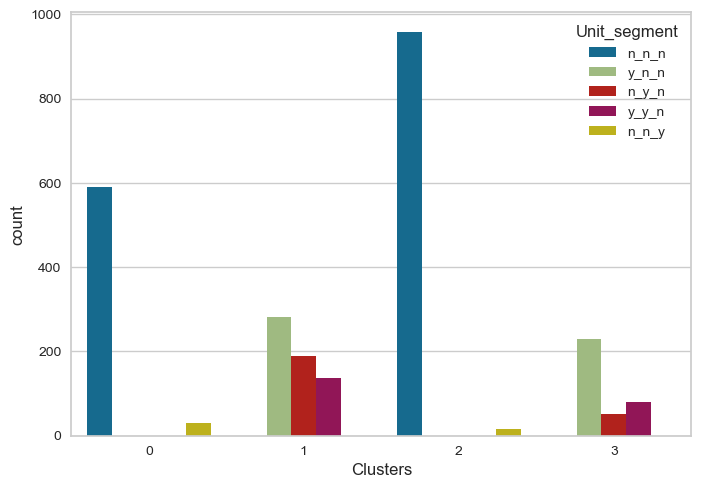

In [134]:
sns.countplot(data=unitseg,x='Clusters',hue='Unit_segment')

<Axes: xlabel='Clusters', ylabel='count'>

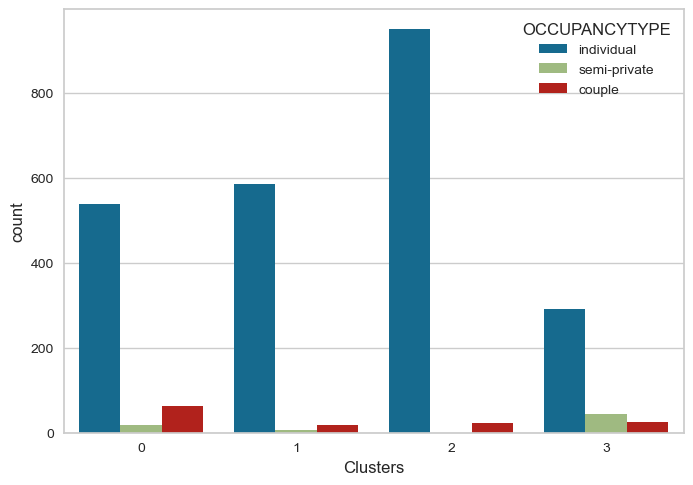

In [136]:
sns.countplot(data=unitseg,x='Clusters',hue='OCCUPANCYTYPE')

<Axes: xlabel='Clusters', ylabel='count'>

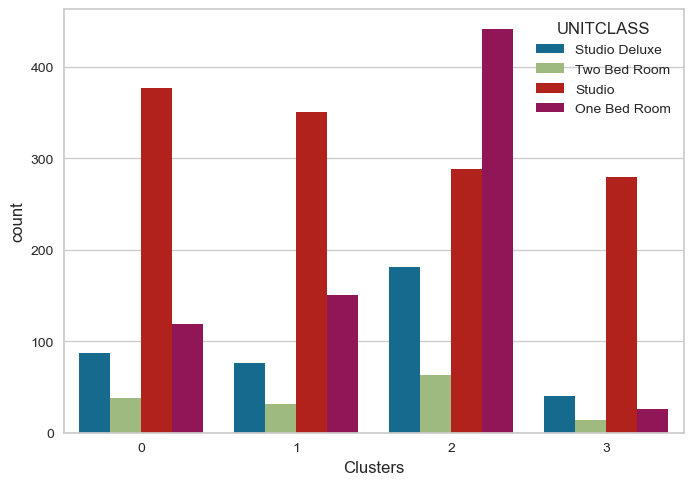

In [137]:
sns.countplot(data=unitseg,x='Clusters',hue='UNITCLASS')